In [278]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Load data


In [279]:
data = pd.read_csv("diabetes.csv")

In [280]:
df = pd.DataFrame(data)

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [282]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [283]:
df.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<Axes: >

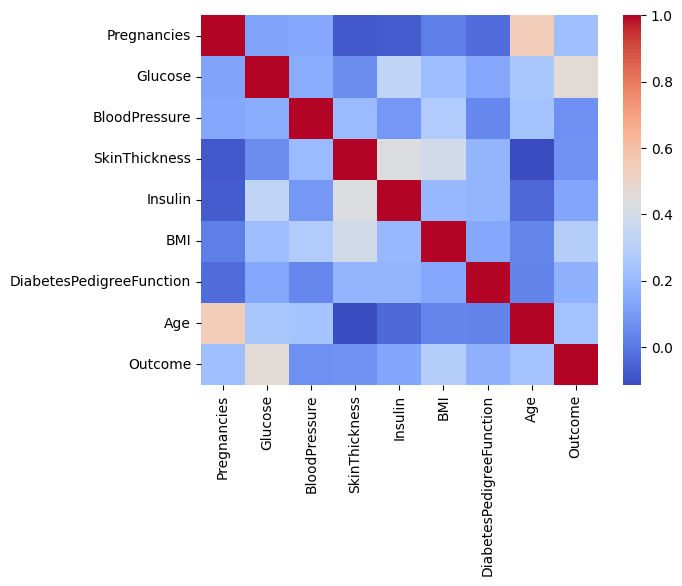

In [284]:
sns.heatmap(data.corr(),cmap="coolwarm")

In [285]:
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [286]:
df["Pregnancies"] = df["Pregnancies"].replace(0, df["Pregnancies"].median())

In [287]:
df["Pregnancies"].unique()

array([ 6,  1,  8,  3,  5, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [288]:
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].median())
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].median())
df["BMI"] = df["BMI"].replace(0, df["BMI"].mean())
df["DiabetesPedigreeFunction"] = df["DiabetesPedigreeFunction"].replace(0, df["DiabetesPedigreeFunction"].median())



In [289]:
X = df.drop(columns="Outcome",axis=1) # feature
y = df["Outcome"] # target

In [290]:
X.shape

(768, 8)

<Axes: >

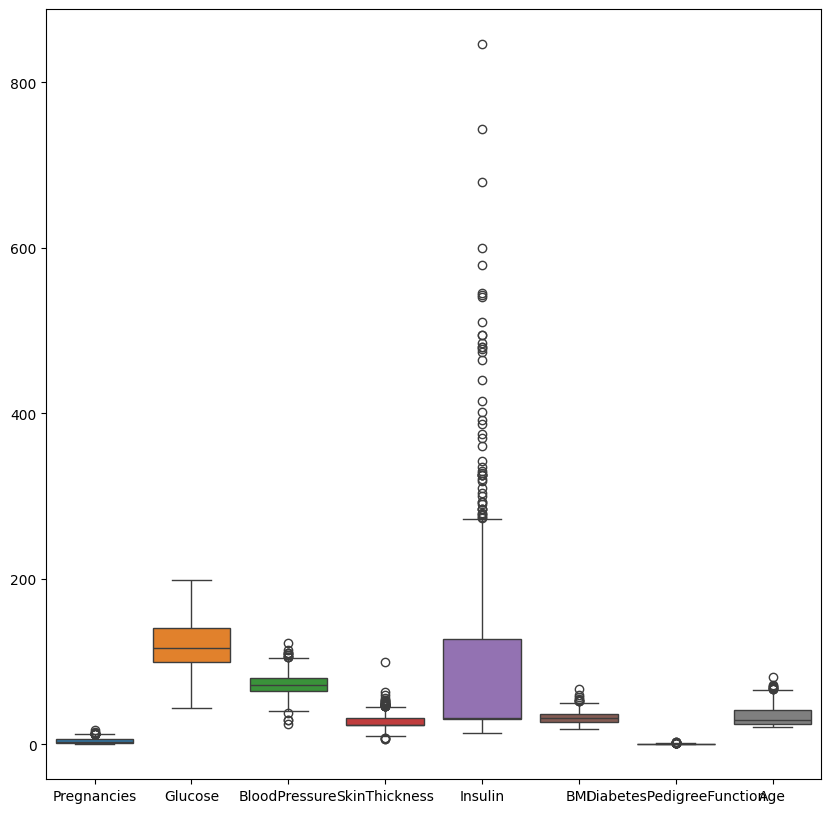

In [291]:
fig,ax = plt.subplots(figsize = (10,10))
sns.boxplot(data=X, ax=ax)

In [292]:
cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

for col in cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (X[col] >= lower_bound) & (X[col] <= upper_bound) 

In [293]:
mask

0      True
1      True
2      True
3      True
4      True
       ... 
763    True
764    True
765    True
766    True
767    True
Name: Age, Length: 768, dtype: bool

In [294]:
X_outlier_detection = X[mask]
y_outlier_detection = y[mask]

In [295]:
X_outlier_detection.shape

(759, 8)

<Axes: >

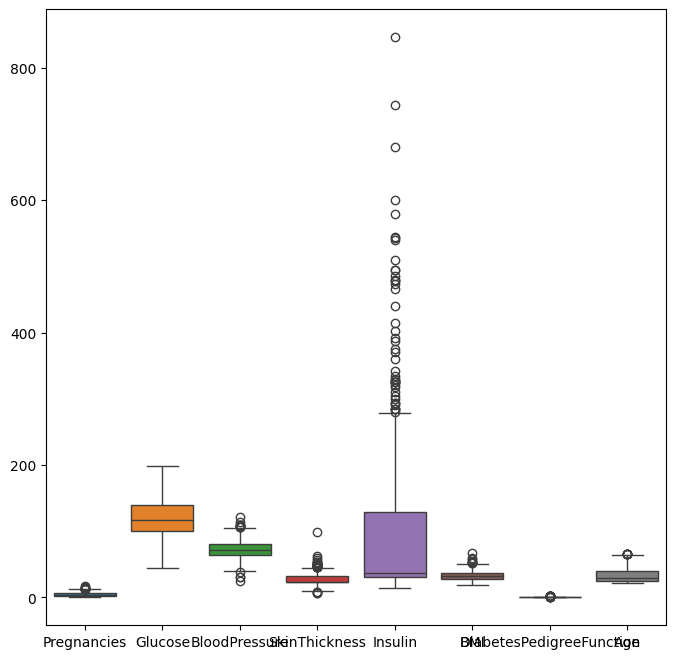

In [296]:
fig,ax = plt.subplots(figsize = (8,8))
sns.boxplot(data=X_outlier_detection, ax=ax)

In [297]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_outlier_detection)
X_scaled_df = pd.DataFrame(data=X_scaled,columns=X_outlier_detection.columns)

In [298]:
X_scaled_df.reset_index(drop=True, inplace=True)
y_outlier_detection.reset_index(drop=True, inplace=True)

In [299]:
q = X_scaled_df['Insulin'].quantile(.95)

mask = X_scaled_df['Insulin'] < q

dataNew = X_scaled_df[mask]

y_outlier_detection = y_outlier_detection[mask]

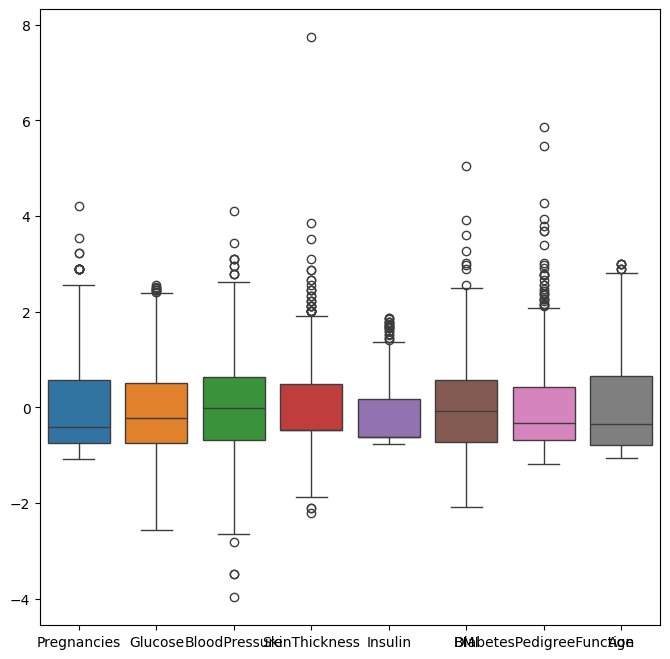

In [300]:
fig, ax = plt.subplots(figsize = (8,8))
sns.boxplot(data = dataNew, ax=ax)
plt.savefig('boxPlot.jpg')

In [333]:
X_train, X_test, y_train, y_test = train_test_split(dataNew,y_outlier_detection,test_size=0.2,random_state=42)

In [334]:
X_train.shape

(576, 8)

In [335]:
y_train.value_counts()

Outcome
0    374
1    202
Name: count, dtype: int64

In [336]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)


In [337]:
y_train_resampled.value_counts()

Outcome
0    374
1    374
Name: count, dtype: int64

In [338]:

from sklearn.linear_model import LogisticRegression

logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train_resampled,y_train_resampled)

LogisticRegression()

In [339]:
y_pred = logistic_reg_model.predict(X_test)

In [340]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [341]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7655172413793103

In [342]:
from sklearn.metrics import classification_report
target_names = ['Non-Diabetic', 'Diabetic']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.87      0.79      0.83       103
    Diabetic       0.58      0.71      0.64        42

    accuracy                           0.77       145
   macro avg       0.72      0.75      0.73       145
weighted avg       0.79      0.77      0.77       145



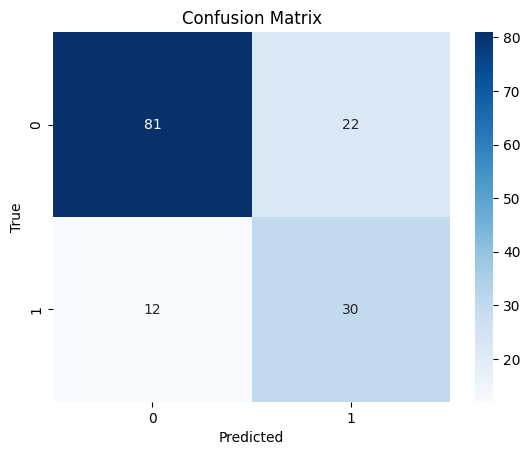

In [343]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [344]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier()

In [345]:
y_pred_clf = clf.predict(X_test)

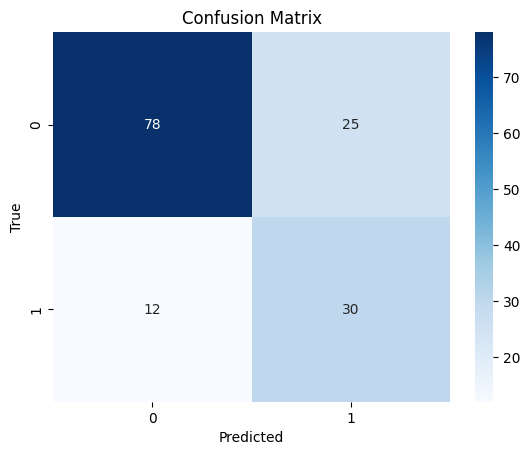

In [346]:
cm = confusion_matrix(y_test,y_pred_clf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [347]:
target_names = ['Non-Diabetic', 'Diabetic']
print(classification_report(y_test, y_pred_clf, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.87      0.76      0.81       103
    Diabetic       0.55      0.71      0.62        42

    accuracy                           0.74       145
   macro avg       0.71      0.74      0.71       145
weighted avg       0.77      0.74      0.75       145



In [348]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train_resampled,y_train_resampled)

SGDClassifier()

In [349]:
y_pred_sgd = sgd.predict(X_test)

In [350]:
target_names = ['Non-Diabetic', 'Diabetic']
print(classification_report(y_test, y_pred_sgd, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.83      0.80      0.81       103
    Diabetic       0.54      0.60      0.57        42

    accuracy                           0.74       145
   macro avg       0.69      0.70      0.69       145
weighted avg       0.75      0.74      0.74       145



In [351]:
accuracy_score(y_test,y_pred)

0.7655172413793103

In [352]:
accuracy_score(y_test,y_pred_clf)

0.7448275862068966

In [353]:
accuracy_score(y_test,y_pred_sgd)

0.7379310344827587

In [354]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       103
           1       0.54      0.60      0.57        42

    accuracy                           0.74       145
   macro avg       0.69      0.70      0.69       145
weighted avg       0.75      0.74      0.74       145



In [355]:
from sklearn.ensemble import RandomForestClassifier
list1=[]
for i in range(1,101):
    classifier= RandomForestClassifier(n_estimators= i, criterion="entropy")  
    classifier.fit(X_train_resampled, y_train_resampled) 
    y_pred_rf=classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred_rf))

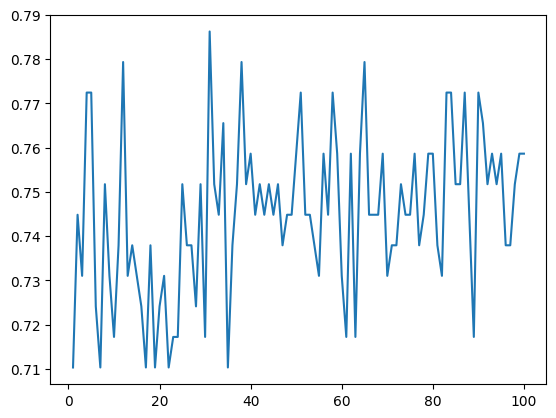

In [356]:
plt.plot(range(1,101),list1)

In [327]:
list2=[]
for i in range(1,78):
    classifier= RandomForestClassifier(n_estimators= i, criterion="entropy")  
    classifier.fit(X_train_resampled, y_train_resampled) 
    y_pred_rf=classifier.predict(X_test)
    list2.append(accuracy_score(y_test,y_pred_rf))

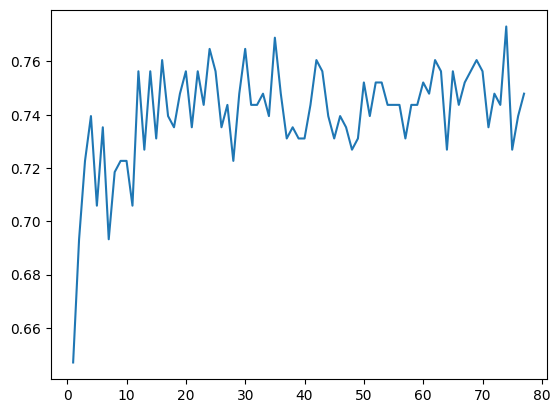

In [328]:
plt.plot(range(1,78),list2)

In [360]:
classifier= RandomForestClassifier(n_estimators= 70, criterion="entropy")  
classifier.fit(X_train_resampled, y_train_resampled) 
y_pred_rf_est=classifier.predict(X_test)

In [361]:
accuracy_score(y_test,y_pred_rf_est)
print(classification_report(y_test, y_pred_rf_est))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       103
           1       0.55      0.71      0.62        42

    accuracy                           0.74       145
   macro avg       0.71      0.74      0.71       145
weighted avg       0.77      0.74      0.75       145



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [38,40, 50, 100],  # List of values to try
    'criterion': ['entropy']
}

# Initialize the model
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameter
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Optimal number of estimators: {best_n_estimators}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

Optimal number of estimators: 100
              precision    recall  f1-score   support

           0       0.87      0.77      0.81       103
           1       0.56      0.71      0.62        42

    accuracy                           0.75       145
   macro avg       0.71      0.74      0.72       145
weighted avg       0.78      0.75      0.76       145



In [363]:
accuracy_score(y_test,y_pred_best)

0.7517241379310344